In [132]:
#import all libiraries we need
import numpy as np  #for numbers
import pandas as pd #for reading csv files and data
import matplotlib.pyplot as plt #
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [133]:
#read csv file using read_csv() function
df = pd.read_csv('Redbull.csv')

In [134]:
#show the data
df.head()

,Volunteer_ID,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,141,162
1,2,Male,30-45,143,153
2,3,Male,30-45,143,153
3,4,Male,30-45,143,157
4,5,Male,30-45,145,159


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Volunteer_ID  120 non-null    int64 
 1   sex           120 non-null    object
 2   agegrp        120 non-null    object
 3   bp_before     120 non-null    int64 
 4   bp_after      120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


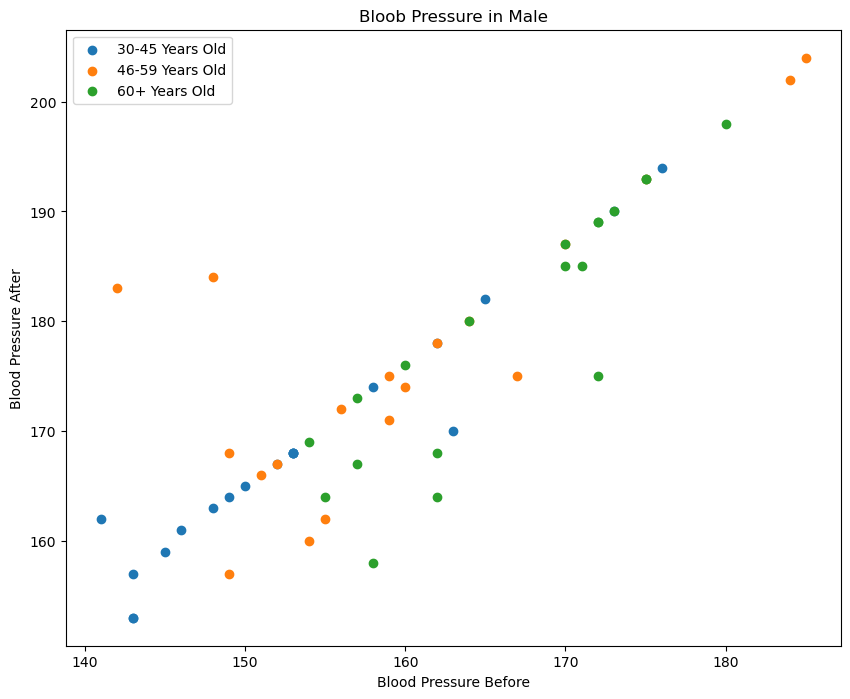

In [136]:
plt.figure(figsize=(10,8))

plt.title('Bloob Pressure in Male')

plt.scatter(df.bp_before[:20], df.bp_after[:20], label = '30-45 Years Old' )
plt.scatter(df.bp_before[21:40], df.bp_after[21:40], label = '46-59 Years Old')
plt.scatter(df.bp_before[41:60], df.bp_after[41:60], label = '60+ Years Old')

plt.xlabel('Blood Pressure Before')
plt.ylabel('Blood Pressure After')

plt.legend()
plt.show()

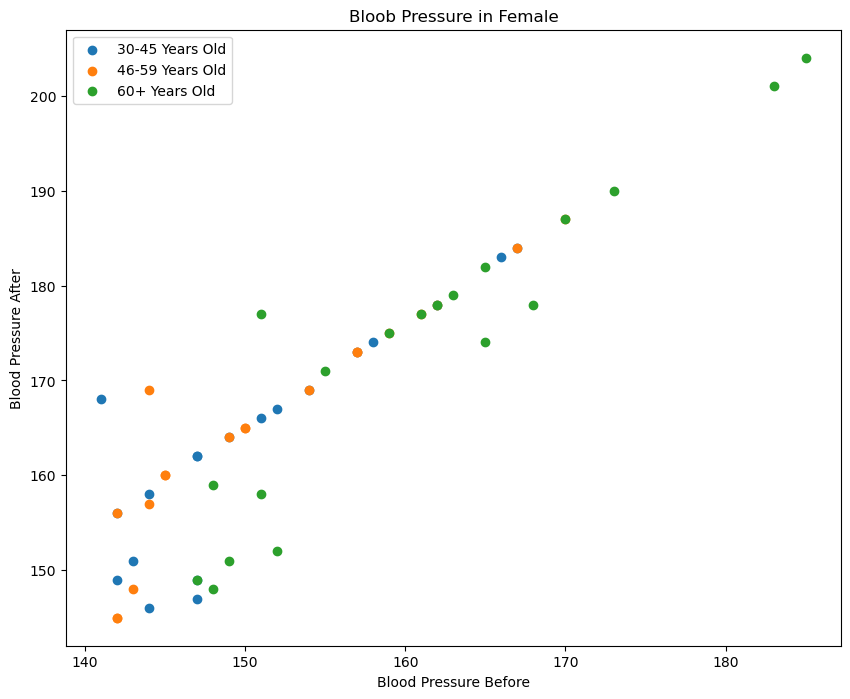

In [137]:
plt.figure(figsize=(10,8))

plt.title('Bloob Pressure in Female')

plt.scatter(df.bp_before[61:80], df.bp_after[61:80], label = '30-45 Years Old' )
plt.scatter(df.bp_before[81:100], df.bp_after[81:100], label = '46-59 Years Old')
plt.scatter(df.bp_before[101:120], df.bp_after[101:120], label = '60+ Years Old')

plt.xlabel('Blood Pressure Before')
plt.ylabel('Blood Pressure After')

plt.legend()
plt.show()

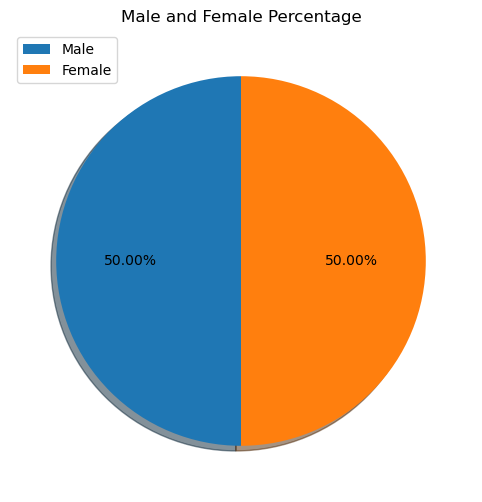

In [138]:
plt.figure(figsize=(8,6))

gender = df.sex.value_counts()
plt.pie(gender,  autopct = '%.2f%%', startangle = 90, shadow = True)
plt.legend(labels = gender.index, loc = 'upper left')

plt.title('Male and Female Percentage')
plt.show()

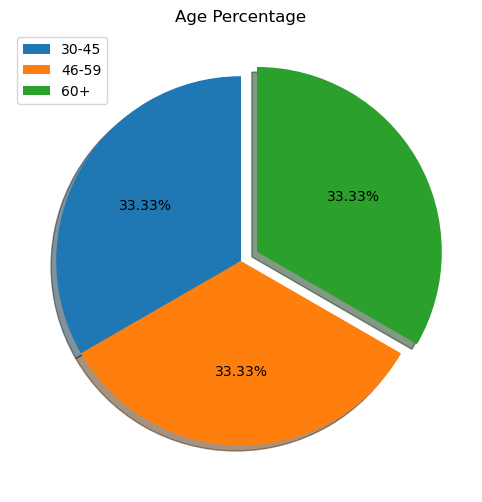

In [139]:
plt.figure(figsize=(8,6))

age =  df.agegrp.value_counts()
plt.pie(age,  explode = [0,0,0.1], autopct= '%.2f%%', startangle = 90, shadow = True)
plt.legend(labels = age.index, loc = 'upper left')

plt.title('Age Percentage')
plt.show()

In [173]:
X_transform = pd.get_dummies(df[['sex','agegrp']])

X = df[['agegrp','bp_before']]
y = df['bp_after']

X_train , X_test, y_train, y_test = train_test_split(X_transform,y, test_size=0.1 , random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)



y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.1832607245591361